In [1]:
import pandas as pd
import numpy as np
import glob
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import json
from collections import Counter

In [50]:
c0df = pd.read_csv("insq_dev_local_entropy.csv")
c1df = pd.read_csv("insq_dev_c1_entropy.csv")

In [58]:
c0df.file.unique()

array(['8_2228_Guns_Reduce_Crime_agg',
       '25_5977_Beware_the_Dragon_A_Booming_China_Spells_Trouble_for_America_agg',
       '40_9973_Break_Up_The_Big_Banks_agg',
       '38_9437_Buy_AmericanHire_American_Policies_Will_Backfire_agg',
       '41_10331_Liberals_Are_Stifling_Intellectual_Diversity_On_Campus_agg',
       '12_2960_Afghanistan_Is_A_Lost_Cause_agg',
       '21_5180_Obamas_Foreign_Policy_Spells_Americas_Decline_agg',
       '17_4134_Abolish_the_Death_Penalty_agg',
       '18_4395_Bush_43_is_the_Worst_President_of_the_Last_50_Years_agg',
       '42_10612_Millennials_Dont_Stand_A_Chance_agg',
       '31_7457_Let_Anyone_Take_A_Job_Anywhere_agg'], dtype=object)

In [59]:
c1_df = c1df[c1df.file == 'Break Up The Big Banks agg']
c0_df = c0df[c0df.file == '40_9973_Break_Up_The_Big_Banks_agg']

In [53]:
s_df.columns

Index(['text', 'file', 'index', 'speaker', 'role', 'labels', 'text_u',
       'length', 'text_u_full', 'start_idx', 'normalised_h', 'tokens_h',
       'sum_h', 'tokens', 'xu_h', 'mode'],
      dtype='object')

In [56]:
import pandas as pd
import matplotlib.pyplot as plt


def show_entropy_timeseries(df, name):

    # Plot the time series
    plt.figure(figsize=(16, 8))

    # Plot different roles with different colors
    roles = df["role"].unique()
    colors = {'for': 'blue', 'against': 'red', 'mod': 'green', 'unknown': 'grey', "audience": 'black'}

    for role in roles:
        role_data = df[df["role"] == role]
        plt.scatter(role_data["index"], role_data['xu_h'], label=role, color=colors[role])

    plt.plot(df["index"], df['xu_h'], color='gray', alpha=0.5)  # Add a connecting line for readability

    # Labels and title
    plt.xlabel("Utterance Index (Time step)")
    plt.ylabel("H-value")
    plt.title(f"Time Series of H-value by Role: {name}")
    plt.legend(title="Role")
    plt.grid(True)

    # Show the plot
    plt.show()


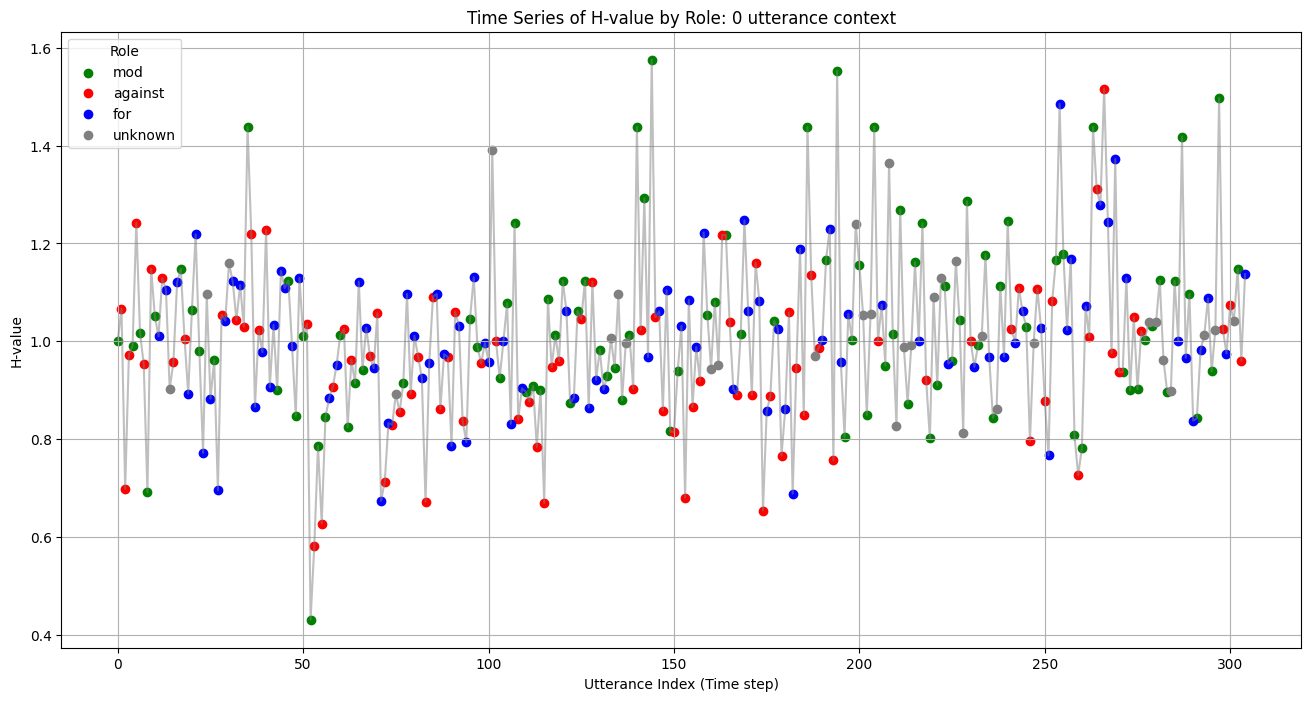

In [61]:
show_entropy_timeseries(c0_df, "0 utterance context")

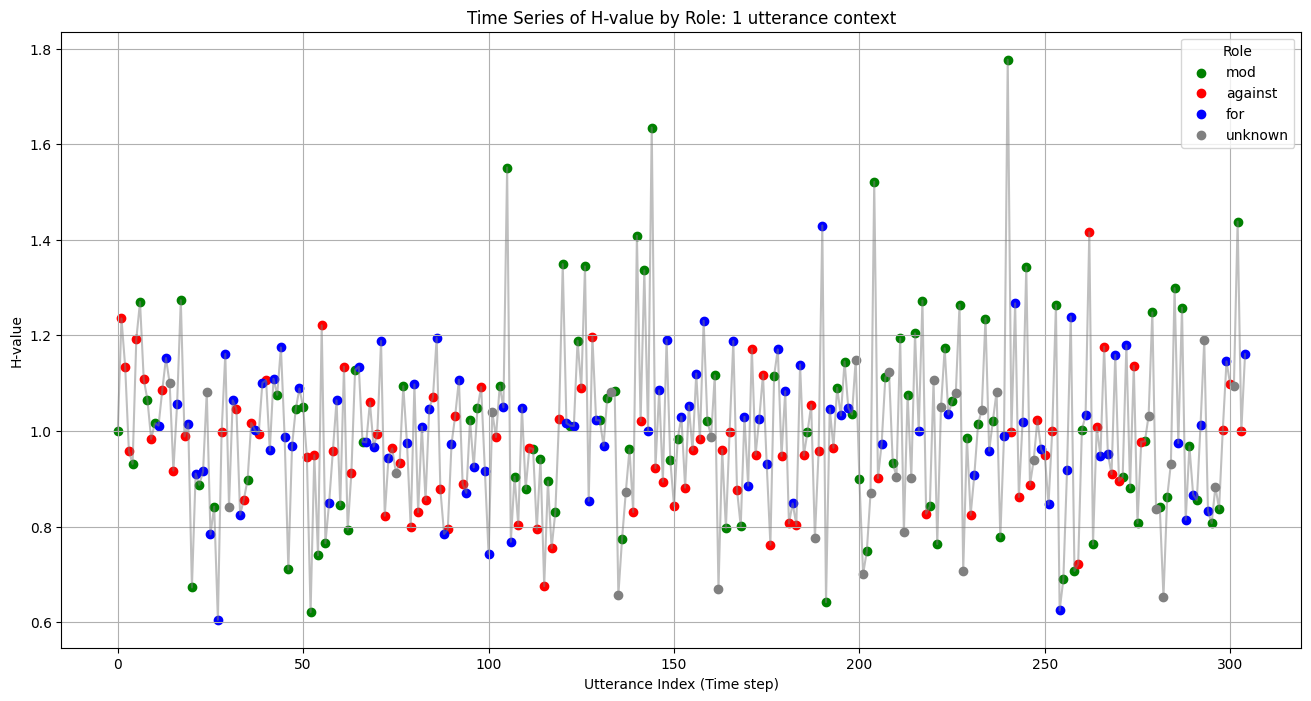

In [60]:
show_entropy_timeseries(c1_df, "1 utterance context")

In [48]:
# Find the index of the row with the highest 'h-value'
max_index = df['xu_h'].idxmax()

# Select the row with the highest 'h-value'
max_row = df.loc[max_index]
print(f"role: {max_row.role}")
print(f"text: {max_row.text}")

role: mod
text: Douglas Elliott, Doug Elliott.


In [49]:
# Find the index of the row with the highest 'h-value'
min_index = df['xu_h'].idxmin()

# Select the row with the highest 'h-value'
min_row = df.loc[min_index]
print(f"role: {min_row.role}")
print(f"text: {min_row.text}")

role: mod
text: No, no, no, no.


In [2]:
import numpy as np
from scipy import stats

# Given data
mean_A = 0.138
std_A = 0.113
n_A = 1724  # Assuming 30 samples for demonstration

mean_B = 0.281
std_B = 0.14
n_B = 944  # Assuming 30 samples for demonstration

# Two-sample t-test (Welch's t-test, which does not assume equal variance)
t_statistic, p_value = stats.ttest_ind_from_stats(
    mean1=mean_A, std1=std_A, nobs1=n_A,
    mean2=mean_B, std2=std_B, nobs2=n_B,
    equal_var=False  # Welch's t-test
)

t_statistic, p_value

(-26.943116062609132, 1.846578214154027e-132)